In [ ]:
import os
import sys

sys.path.append(os.path.abspath('..'))

In [32]:
import base64
import io
from typing import Dict, List, Optional

import httpx
from loguru import logger
from smolagents import Tool, tools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src.agent.adapters.tools.base import BaseTool

In [11]:
## monkey patching

tools.AUTHORIZED_TYPES = [
    "string",
    "boolean",
    "integer",
    "number",
    "image",
    "audio",
    "array",
    "object",
    "any",
    "null",
    "list",
    "dict",
    "dataframe"
]

In [20]:
class PlotData(BaseTool):
    name = "plot_data"
    description = """Plot data from data."""
    inputs = {
        "data": {"type": "dataframe", "description": "asset id data"},
    }
    outputs = {"plot": {"type": "str", "description": "encoded plot"}}
    output_type = "dict"

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def forward(self, data: pd.DataFrame) -> Dict[str, str]:
        if data.empty:
            return {"plot": None}

        fig, ax = plt.subplots(figsize=(12, 6))

        for column_name in data.columns:
            ax.plot(
                data.index, data[column_name], label=column_name, marker="o", linestyle="--"
            )
            ax.set_xlabel("Date")
            ax.set_ylabel("Value")
            ax.set_title("Time Series Plot (Manual)")
            ax.grid(True)
            ax.legend(title="Series Name")

        buf = io.BytesIO()

        # Save the figure to the buffer in PNG format (or 'jpeg', 'svg', etc.)
        # bbox_inches='tight' helps remove extra whitespace around the plot
        fig.savefig(buf, format="png", bbox_inches="tight")

        buf.seek(0)

        # Read the binary data from the buffer
        image_binary = buf.read()

        base64_bytes = base64.b64encode(image_binary)
        base64_string = base64_bytes.decode("utf-8")

        buf.close()
        plt.close(fig)

        return {"plot": base64_string}

In [21]:
kwargs = {"base_url": "http://localhost:5050"}

In [22]:
tool = PlotData(**kwargs)

In [23]:
temp = pd.read_csv("temp.csv")

In [24]:
out = tool.forward(temp)

In [28]:
base64_string_to_decode = out["plot"]

In [30]:
import matplotlib.image as mpimg

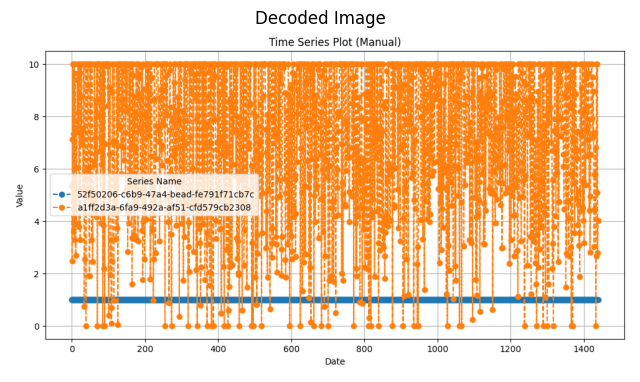

In [31]:
image_bytes = base64.b64decode(base64_string_to_decode)

# 2. Create an in-memory buffer from the bytes
image_buffer = io.BytesIO(image_bytes)

# 3. Load Image from Buffer using Matplotlib
# mpimg.imread can read from a file-like object
img_data = mpimg.imread(image_buffer, format='png') # Specify format if known (e.g., 'png', 'jpeg')

# 4. Display Image using Matplotlib
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
plt.imshow(img_data)
plt.axis('off')  # Turn off axis numbers and ticks for a cleaner image display
plt.title("Decoded Image")
plt.show()
